Import potrzebnych bibliotek

In [1]:
import pandas as pd #obsługa danych
import matplotlib.pyplot as plt #dodatkowe funkcje, customizacja
%matplotlib inline
import seaborn as sns #do wizualizacji i plotowania
from IPython.display import display

pd.plotting.register_matplotlib_converters()

Pobieranie danych

In [2]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets
wine = pd.read_csv('ml-throwdown-datasets/wine.csv')
display(wine.head())

fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


Jedną z największych zalet Seaborn jest różnorodność funkcji kreślenia. Na przykład utworzenie wykresu punktowego to tylko jeden wiersz kodu przy użyciu funkcji lmplot ().

Można to zrobić na dwa sposoby.

- Pierwszym sposobem (zalecanym) jest przekazanie DataFrame do argumentu data =, przy jednoczesnym przekazaniu nazw kolumn do argumentów ax, x = i y =.
- Drugim sposobem jest bezpośrednie przekazanie szeregów danych do argumentów osi.



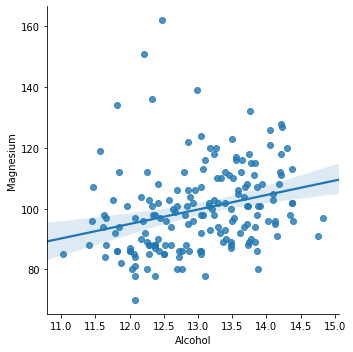

In [3]:

# Recommended way
sns.lmplot(x='Alcohol', y='Magnesium', data=wine)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Nawiasem mówiąc, Seaborn nie ma dedykowanej funkcji wykresu punktowego. Właściwie użyliśmy funkcji Seaborn do dopasowania i wykreślenia linii regresji.

Na szczęście każda funkcja drukowania ma kilka przydatnych opcji, które można ustawić. Oto jak możemy ulepszyć lmplot ():

- Najpierw ustawimy fit_reg = False, aby usunąć linię regresji, ponieważ chcemy uzyskać wykres punktowy.
- Następnie ustawimy hue = 'Class', aby pokolorować nasze punkty zgodnie z klasą przykładu.



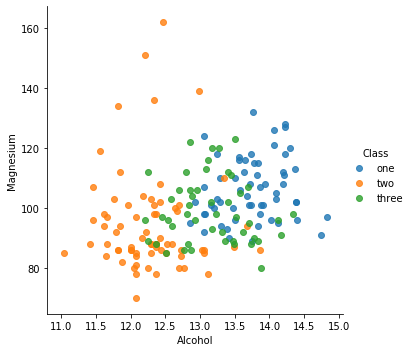

In [6]:
# Scatterplot arguments
sns.lmplot(x='Alcohol', y='Magnesium', data=wine,
           fit_reg=False, # No regression line
           hue='Class')   # Color by evolution stage

Seaborn to interfejs wysokiego poziomu do Matplotlib. Czasami konieczne będzie więc wykorzystanie funkcji Matplotlib.

Ustawienie limitów osi jest jednym z takich przypadków.

(11, 14)

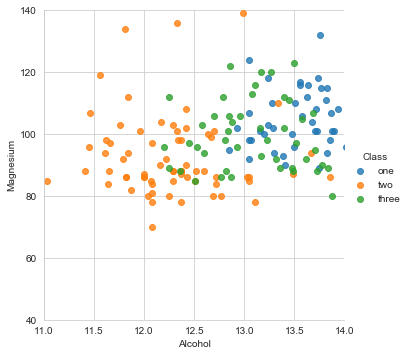

In [31]:
# Scatterplot arguments
sns.lmplot(x='Alcohol', y='Magnesium', data=wine,
           fit_reg=False, # No regression line
           hue='Class')   # Color by class

# Tweak using Matplotlib
plt.ylim(40, 140)
plt.xlim(11, 14)

# Zadanie

Wczytaj zbiór co2 i wyświetl wykres punktowy wartości co2

In [32]:
co2 = pd.read_csv('ml-throwdown-datasets/co2.csv', na_values=-99.99,
                  parse_dates=True, index_col='Date')
co2.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


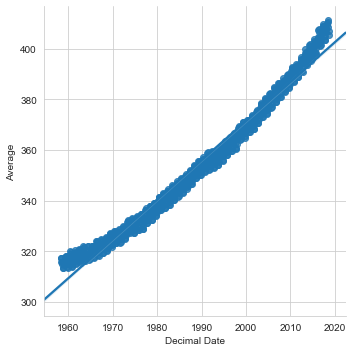

In [33]:
sns.lmplot(x='Decimal Date', y='Average', data=co2)

Wykresy pudełkowe

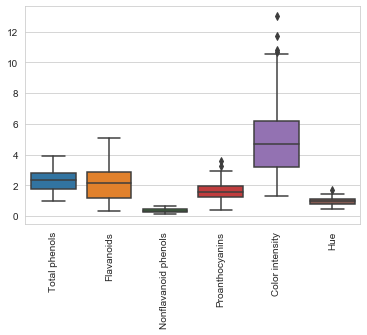

In [34]:
# Boxplot
g = sns.boxplot(data=wine.iloc[:,5:-2]) #zobaczcie co się stanie jak damy cały zakres danych
g.xaxis.set_tick_params(rotation=90)

Kolejną zaletą Seaborn jest to, że ma gotowe motywy. Domyślny motyw nazywa się „darkgrid”.

Następnie zmienimy motyw na "whitegrid” podczas tworzenia wykresu skrzypcowego (violinplot), pokazującego również rozkład wartości (inaczej niż w boxplotach).

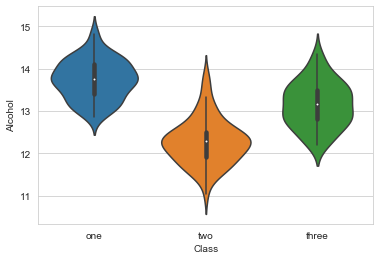

In [11]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Class', y='Alcohol', data=wine)

Wykresy skrzypcowe świetnie nadają się do wizualizacji dystrybucji. Ponieważ jednak w naszym zestawie danych znajduje się tylko 170 win, możemy po prostu wyświetlić każdy punkt - z użyciem swarmplot, pokazującego położenie każdego punktu, układając na sobie te o podobnych wartościach.

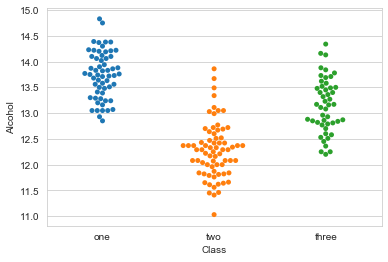

In [12]:
sns.swarmplot(x='Class', y='Alcohol', data=wine)

Połączenie violinplot i swarmplot:

- Po pierwsze, powiększymy naszą figurę za pomocą Matplotlib.
- Następnie nakreślimy violinplot z parametrem `inner = None`.
- Wewnątrz, kreślimy swarmplot z czarnymi punktami.
- Na koniec ustawimy tytuł za pomocą Matplotlib.

Text(0.5, 1.0, 'Alkohol w zależności od typu wina')

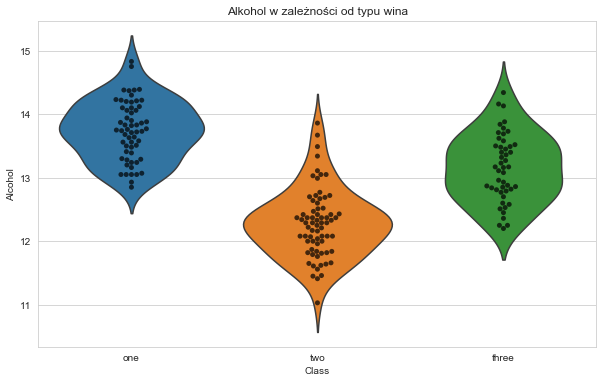

In [35]:

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Class',
               y='Alcohol', 
               data=wine, 
               inner=None, # Remove the bars inside the violins
               )
 
sns.swarmplot(x='Class', 
              y='Alcohol', 
              data=wine, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Alkohol w zależności od typu wina')

# Zadanie

Wykonaj wykresy boxplot, violinplot oraz swarmplot dla zbioru danych olimpijczyków

In [40]:
medals = pd.read_csv('ml-throwdown-datasets/olympic.csv', index_col=['Year', 'ID'])
medals.head()

,,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,ID,,,,,,,,,,,,,
1992,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2012,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1920,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN
1900,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1988,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [41]:
def groupby_column(dataframe, column):
    groupby = dataframe.groupby(column)
    return {x: groupby.get_group(x) for x in groupby.groups}

all_sports = groupby_column(medals, 'Sport')

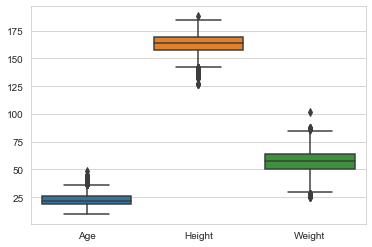

In [42]:
sns.boxplot(data=all_sports['Gymnastics']) 

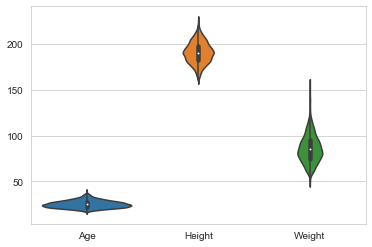

In [43]:
sns.violinplot(data=all_sports['Basketball'])

Z pewnością moglibyśmy powtórzyć ten wykres dla każdej statystyki. Ale możemy też połączyć te informacje w jedną kolumnę z użyciem funkcji `pd.melt`.

In [45]:
# Melt DataFrame
melted_df = pd.melt(wine.iloc[:,5:], 
                    id_vars="Class", # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Class,Stat,value
0,one,Total phenols,2.80
1,one,Total phenols,2.65
2,one,Total phenols,2.80
3,one,Total phenols,3.85
4,one,Total phenols,2.80


In [46]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 3 columns):
Class    1246 non-null object
Stat     1246 non-null object
value    1246 non-null float64
dtypes: float64(1), object(2)
memory usage: 29.3+ KB


Teraz możemy zrobić swarmplot przy pomocy melted_df.

Ale tym razem ustawimy x = „Stat” i y = „wartość”, więc nasze wykresy będą rozdzielone atrybutem stat.`hue = 'Class'` pozwala pokolorować punkty według typu wina.



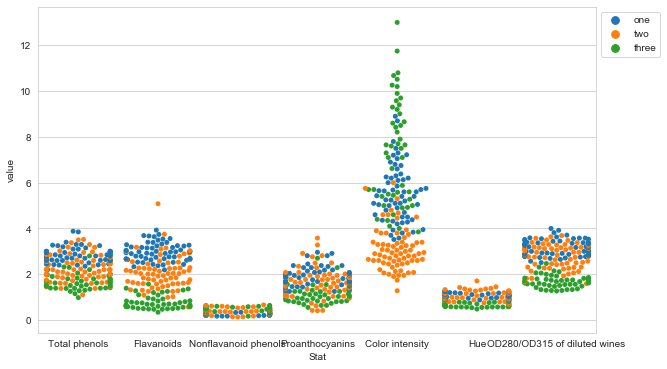

In [47]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Class')

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Inne przydatne wykresy

Mapa ciepła

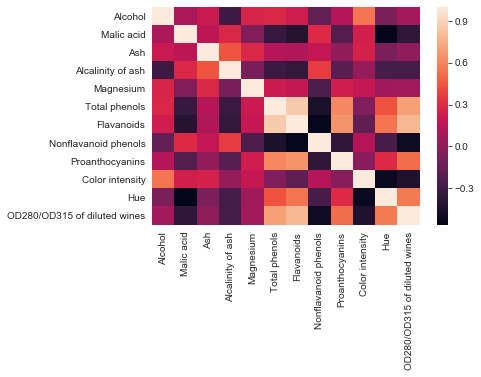

In [51]:
# Calculate correlations
corr = wine.corr()
 
# Heatmap
sns.heatmap(corr)

Histogram

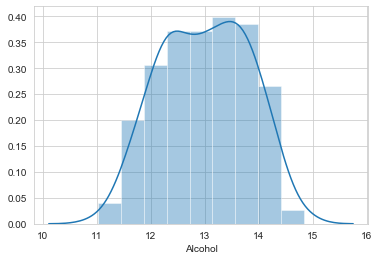

In [52]:
# histogram
sns.distplot(wine.Alcohol)

Count plot

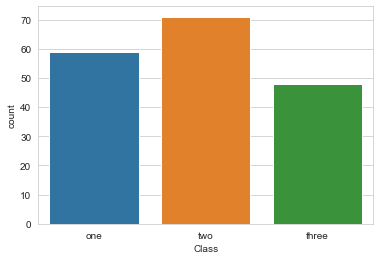

In [53]:
# Count Plot (histogram dla zmiennych kategorycznych)
sns.countplot(x='Class', data=wine)

Density plot (rozkład gęstości)

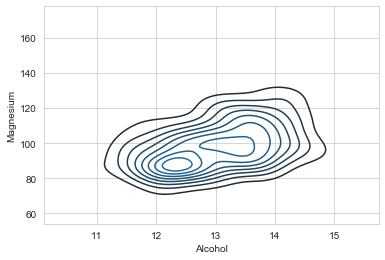

In [54]:
# Density Plot
sns.kdeplot(wine.Alcohol, wine.Magnesium)

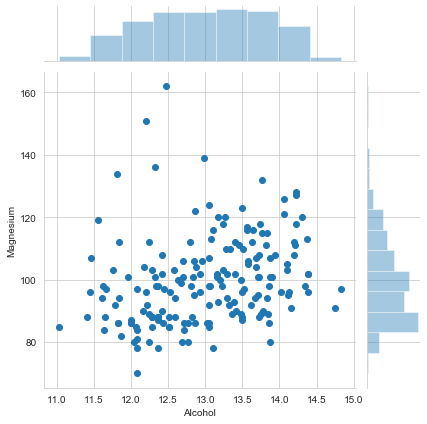

In [27]:
# Joint Distribution Plot
sns.jointplot(x='Alcohol', y='Magnesium', data=wine)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


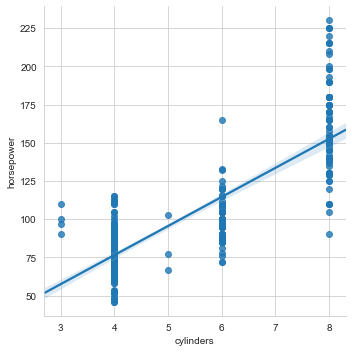

In [55]:
cars = pd.read_csv('ml-throwdown-datasets/auto_mpg.csv', na_values='?')
display(cars.head())
sns.lmplot(x='cylinders', y='horsepower', data=cars) #zależność cylindrów od mocy

In [56]:
melted_df = pd.melt(cars, 
                    id_vars=["cylinders", "origin"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,cylinders,origin,Stat,value
0,8,1,displacement,307.0
1,8,1,displacement,350.0
2,8,1,displacement,318.0
3,8,1,displacement,304.0
4,8,1,displacement,302.0


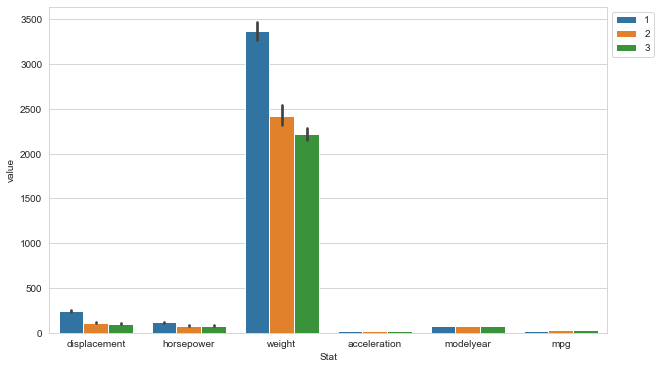

In [58]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

# Swarmplot with melted_df
sns.barplot(x='Stat', y='value', data=melted_df, 
              hue="origin") #lub origin

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)